In [479]:
# Ignorando mensagens de avisos.
import warnings
warnings.filterwarnings("ignore")

# Importando o Numpy e Pandas
import numpy as np
import pandas as pd

# Tratamento de dados
from itertools import compress

# visualização de dados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
df = pd.read_csv('MICRODADOS_BAIRROS.csv', error_bad_lines=False, encoding='latin1')

b'Skipping line 1184: expected 9 fields, saw 10\n'


In [12]:
df2 = pd.read_csv('MICRODADOS.csv', error_bad_lines=False, encoding='latin1', warn_bad_lines=False, sep=';', parse_dates=True)

In [144]:
#df2.apply(lambda x: x.isna().sum() / len(df2) if x.isna().sum() / len(df2) != 0 else '')
print(df2.Classificacao.unique())
df2.head()

['Descartados' 'Suspeito' 'Confirmados']


,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,2021-07-07,2020-10-20,2021-07-02,NaN,2020-10-20,NaN,NaN,2020-10-20,NaN,Descartados,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
1,2021-07-07,2021-07-07,2021-06-20,NaN,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
2,2021-07-07,2021-07-07,2021-07-03,2021-07-07,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
3,2021-07-07,2021-07-07,2021-07-01,NaN,2021-07-01,NaN,NaN,NaN,NaN,Descartados,...,Sim,Não,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
4,2021-07-07,2021-07-07,2021-06-30,2021-07-07,2021-07-06,NaN,NaN,NaN,NaN,Suspeito,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno


In [38]:
df2.columns

Index(['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito',
       'Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude', 'PossuiDeficiencia',
       'MoradorDeRua', 'ResultadoRT_PCR', 'ResultadoTesteRapido',
       'ResultadoSorologia', 'ResultadoSorologia_IGG', 'TipoTesteRapido'],
      dtype='object')

In [376]:
df3 = df2[['Classificacao', 'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia',
     'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'DataObito']].dropna()

In [26]:
#df3.groupby('DataObito').size().plot(figsize=(15,10))

In [378]:
df3['Sintomas'] = df3[['Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia',
     'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade']].values.tolist()
df3.head(3)

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas
4285,Confirmados,Sim,Não,Não,Não,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-07,"[Sim, Não, Não, Não, Sim, Não, Sim, Não, Não, ..."
5569,Suspeito,Não,Sim,Não,Não,Não,Não,Não,Não,Sim,Não,Sim,Não,Não,2021-07-06,"[Não, Sim, Não, Não, Não, Não, Não, Não, Sim, ..."
6031,Suspeito,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,2021-07-07,"[Não, Sim, Não, Não, Não, Não, Não, Não, Não, ..."


In [379]:
sintomas = ['Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia',
     'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade']

In [380]:
df3['Sintomas'] = df3['Sintomas'].apply(lambda x: [True if item=='Sim' else False for item in x])

In [381]:
df3['Sintomas'] = df3['Sintomas'].apply(lambda x: list(compress(sintomas, x)))

In [382]:
df3['Qntd_sintomas'] = df3['Sintomas'].apply(lambda x: len(x))

In [383]:
df3.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas,Qntd_sintomas
4285,Confirmados,Sim,Não,Não,Não,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-07,"[Febre, DorGarganta, Cefaleia]",3
5569,Suspeito,Não,Sim,Não,Não,Não,Não,Não,Não,Sim,Não,Sim,Não,Não,2021-07-06,"[DificuldadeRespiratoria, ComorbidadeCardio, C...",3
6031,Suspeito,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,2021-07-07,"[DificuldadeRespiratoria, ComorbidadeRenal]",2
7866,Descartados,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Sim,2021-07-06,"[ComorbidadeCardio, ComorbidadeObesidade]",2
14425,Descartados,Não,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-05,"[DificuldadeRespiratoria, Tosse, Coriza, Cefal...",6


In [384]:
df3['Classificacao'].value_counts()

Confirmados    11803
Descartados     3053
Suspeito          33
Name: Classificacao, dtype: int64

In [385]:
# df2.iloc[df3[df3['Qntd_sintomas']==0].index].head()
confirmados = df3[df3['Classificacao']=='Confirmados']
descartados = df3[df3['Classificacao']=='Descartados']
suspeitos = df3[df3['Classificacao']=='Suspeitos']
#confirmados['DataObito'] = pd.to_datetime(confirmados['DataObito'])
#descartados['DataObito'] = pd.to_datetime(descartados['DataObito'])
#suspeitos['DataObito'] = pd.to_datetime(suspeitos['DataObito'])

In [386]:
confirmados['Assintomatico'] = confirmados.Sintomas.apply(lambda x:  'sim' if x==[] else 'nao')
confirmados.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas,Qntd_sintomas,Assintomatico
4285,Confirmados,Sim,Não,Não,Não,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-07,"[Febre, DorGarganta, Cefaleia]",3,nao
17875,Confirmados,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-05,[Febre],1,nao
20640,Confirmados,Não,Sim,Não,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-04,"[DificuldadeRespiratoria, Cefaleia, Comorbidad...",4,nao
22613,Confirmados,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-03,"[DificuldadeRespiratoria, Tosse]",2,nao
29328,Confirmados,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Sim,Não,Não,2021-07-05,"[Febre, Tosse, Coriza, ComorbidadeDiabetes]",4,nao


In [387]:
dic = {}
for i in confirmados['Sintomas'].apply(lambda x: x):
    for j in i:
        dic[j] = dic.get(j, 0) + 1

In [388]:
sintomas = pd.Series(dic)
sintomas_prop = round(sintomas / sintomas.sum() * 100, ndigits=2)
sintomas_prop.sort_values()

ComorbidadeRenal            1.38
ComorbidadeTabagismo        1.40
ComorbidadePulmao           2.12
ComorbidadeObesidade        2.87
Diarreia                    3.40
DorGarganta                 3.93
Coriza                      5.33
Cefaleia                    7.85
ComorbidadeDiabetes         8.23
DificuldadeRespiratoria    15.17
Febre                      15.25
ComorbidadeCardio          15.45
Tosse                      17.60
dtype: float64

Text(0.5, 0, '# de pessoas com o sintoma')

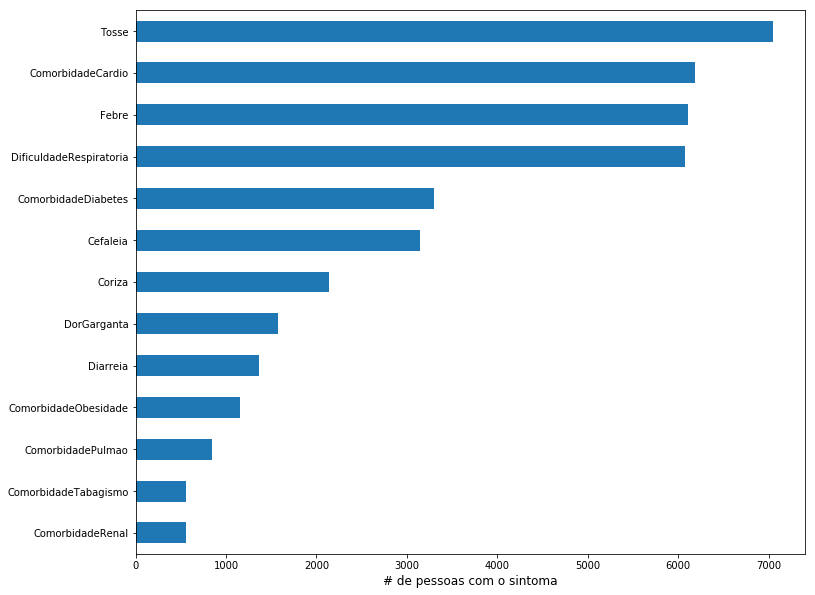

In [390]:
pd.DataFrame({'Qntd': sintomas}).sort_values('Qntd').plot.barh(legend=False, figsize=(12,10))
plt.xlabel('# de pessoas com o sintoma', fontsize=12)

É possível notar que **Tosse, Comorbidade Cardiorespiratória, Febre, Dificuldade respiratoria** são os sintomas mais recorrentes em pessoas com covid.

In [391]:
from datetime import datetime
#confirmados['mensal'] = pd.confirmados['DataObito'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
confirmados['DataObito'] = pd.to_datetime(confirmados['DataObito'])
confirmados.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas,Qntd_sintomas,Assintomatico
4285,Confirmados,Sim,Não,Não,Não,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-07,"[Febre, DorGarganta, Cefaleia]",3,nao
17875,Confirmados,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-05,[Febre],1,nao
20640,Confirmados,Não,Sim,Não,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-04,"[DificuldadeRespiratoria, Cefaleia, Comorbidad...",4,nao
22613,Confirmados,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-03,"[DificuldadeRespiratoria, Tosse]",2,nao
29328,Confirmados,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Sim,Não,Não,2021-07-05,"[Febre, Tosse, Coriza, ComorbidadeDiabetes]",4,nao


Text(0.5, 1.0, 'Mortes clientes classificados como Confirmados')

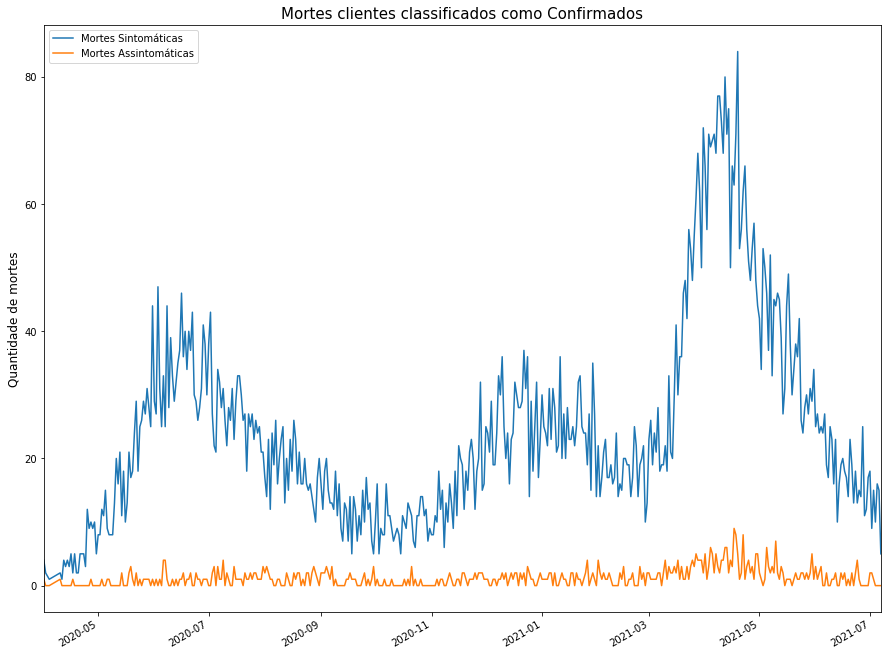

In [566]:
# Mortes com e sem sintomas
#confirmados[confirmados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
#confirmados[confirmados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
confirmados.groupby(['DataObito', 'Assintomatico']).size().unstack().fillna(0).plot(figsize=(15,12))
plt.legend(['Mortes Sintomáticas', 'Mortes Assintomáticas'])
plt.xlabel('')
plt.ylabel('Quantidade de mortes', fontsize=12)
plt.title('Mortes clientes classificados como Confirmados', fontsize=15)

Em casos de mortes com Covid confirmado é possível notar que quase não houve mudança na quantidade de mortes. Entrentanto, podemos ver que exitem **três** picos em pessoas sintomáticas.

In [545]:
#confirmados.plot.scatter(x=confirmados['DataObito'], y=confirmados['Qntd_sintomas'])

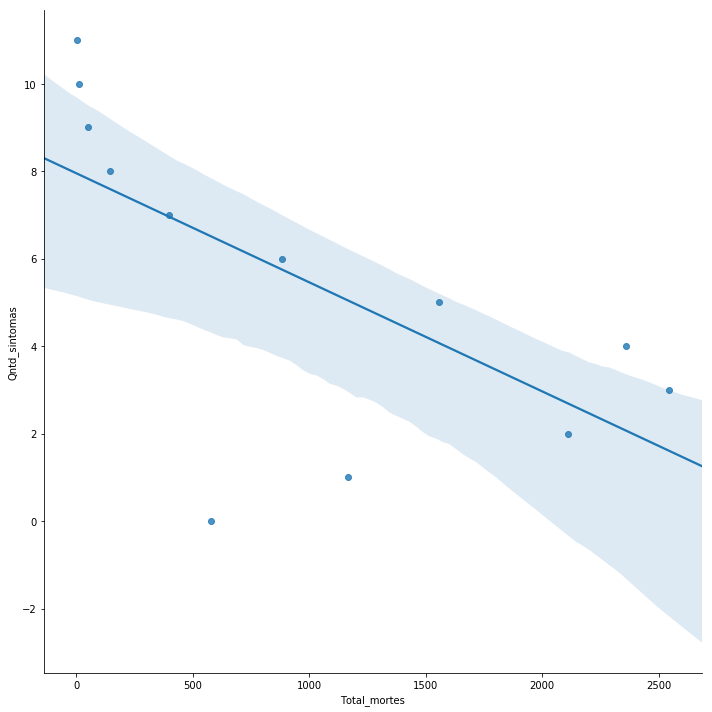

In [546]:
sintomasXmortes = confirmados.groupby(['Qntd_sintomas']).size().to_frame('Total_mortes')
sintomasXmortes = sintomasXmortes.reset_index()
sns.lmplot(data=sintomasXmortes, y='Qntd_sintomas', x='Total_mortes', height=10)

In [547]:
sintomasXmortes.corr()

,Qntd_sintomas,Total_mortes
Qntd_sintomas,1.000000,-0.658328
Total_mortes,-0.658328,1.000000


Podemos ver que temos uma correlação negativa mediana entre à **quantidade de sintomas** e a **quantidade de mortes**.

In [574]:
descartados['Assintomatico'] = descartados.Sintomas.apply(lambda x:  'sim' if x==[] else 'nao')
descartados['DataObito'] = pd.to_datetime(descartados['DataObito'])

Text(0.5, 1.0, 'Mortes Descartados x Confirmados - Sintomáticos')

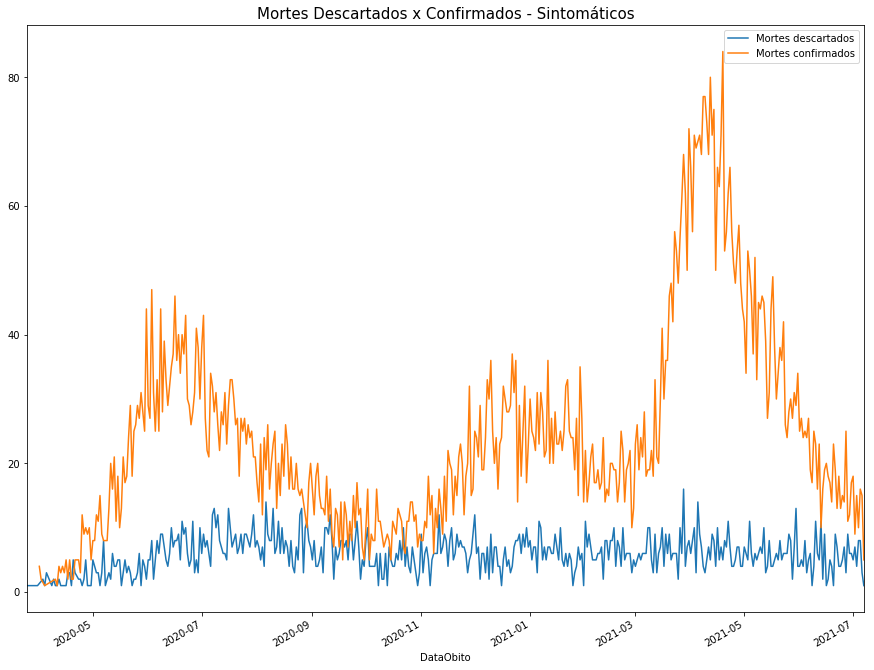

In [576]:
descartados[descartados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
confirmados[confirmados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
plt.legend(['Mortes descartados', 'Mortes confirmados'])
plt.title('Mortes Descartados x Confirmados - Sintomáticos', fontsize=15)

Text(0.5, 1.0, 'Mortes Descartados x Confirmados - Sintomáticos')

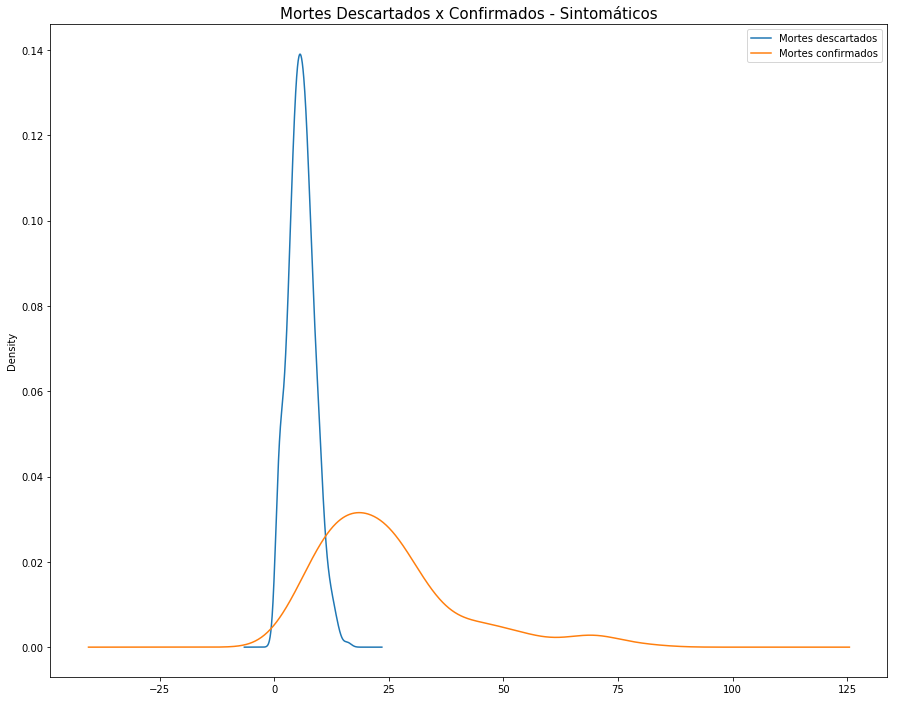

In [582]:
descartados[descartados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot.kde(figsize=(15,12))
confirmados[confirmados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot.kde(figsize=(15,12))
plt.legend(['Mortes descartados', 'Mortes confirmados'])
plt.title('Mortes Descartados x Confirmados - Sintomáticos', fontsize=15)

Text(0.5, 1.0, 'Mortes Descartados x Confirmados - Assintomáticos')

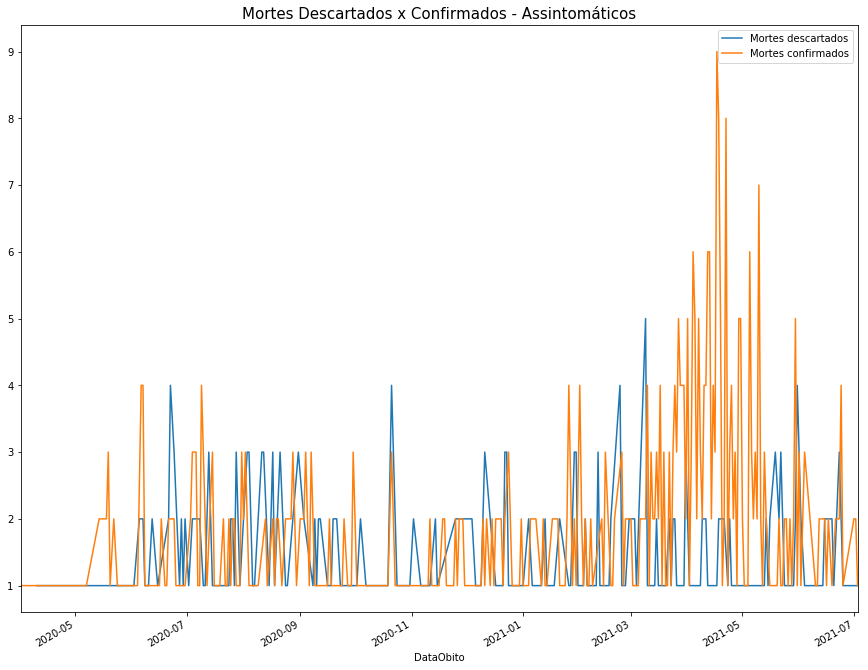

In [579]:
descartados[descartados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
confirmados[confirmados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
plt.legend(['Mortes descartados', 'Mortes confirmados'])
plt.title('Mortes Descartados x Confirmados - Assintomáticos', fontsize=15)

Text(0.5, 1.0, 'Mortes Descartados x Confirmados - Assintomáticos')

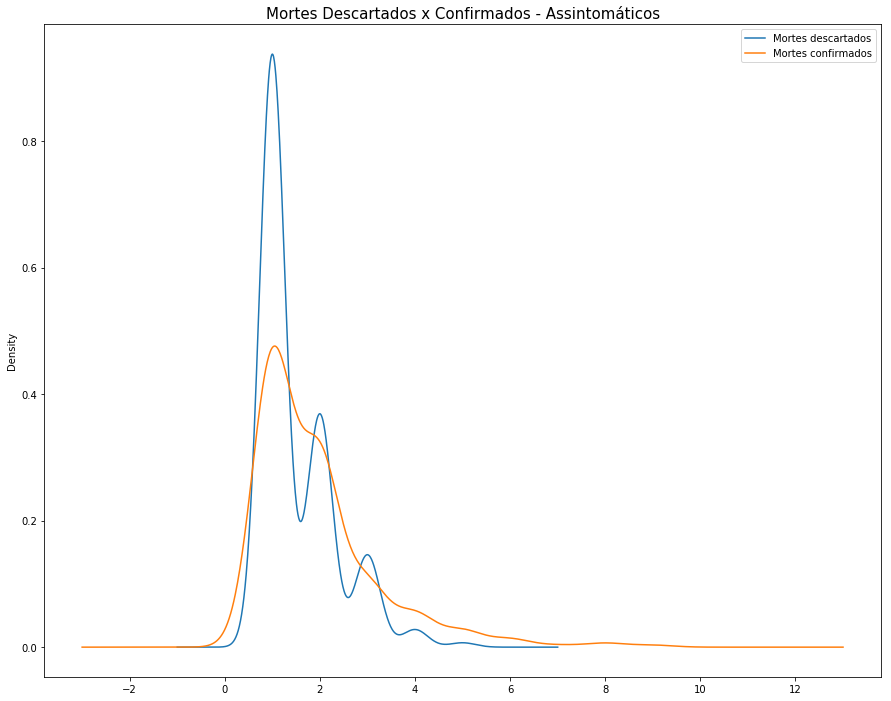

In [581]:
descartados[descartados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot.kde(figsize=(15,12))
confirmados[confirmados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot.kde(figsize=(15,12))
plt.legend(['Mortes descartados', 'Mortes confirmados'])
plt.title('Mortes Descartados x Confirmados - Assintomáticos', fontsize=15)